In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [2]:
iris = pd.read_csv("Iris.csv")

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [6]:
iris.drop("Id", axis = 1, inplace = True)

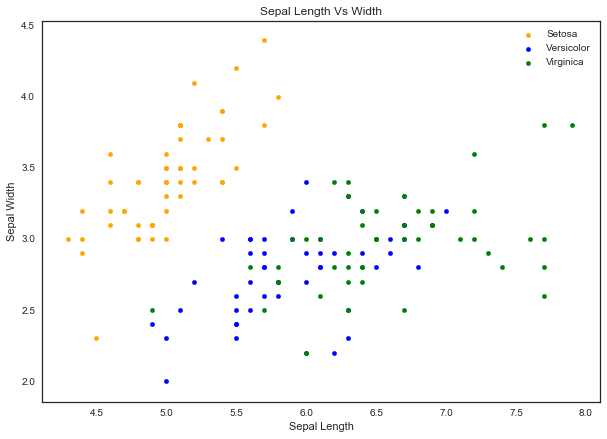

In [7]:
#Some EDA with Iris
fig = iris[iris.Species == 'Iris-setosa'].plot(kind = 'scatter', x = 'SepalLengthCm', y = 'SepalWidthCm', color = 'Orange', label = 'Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind = 'scatter', x = 'SepalLengthCm', y = 'SepalWidthCm', color = 'blue', label = 'Versicolor', ax = fig)
iris[iris.Species == 'Iris-virginica'].plot(kind = 'scatter', x = 'SepalLengthCm', y = 'SepalWidthCm', color = 'green', label = 'Virginica', ax = fig)
fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig = plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

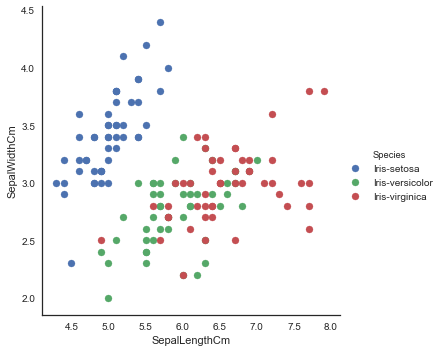

In [8]:
sns.FacetGrid(iris, hue = 'Species', size = 5)\
   .map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm')\
   .add_legend()


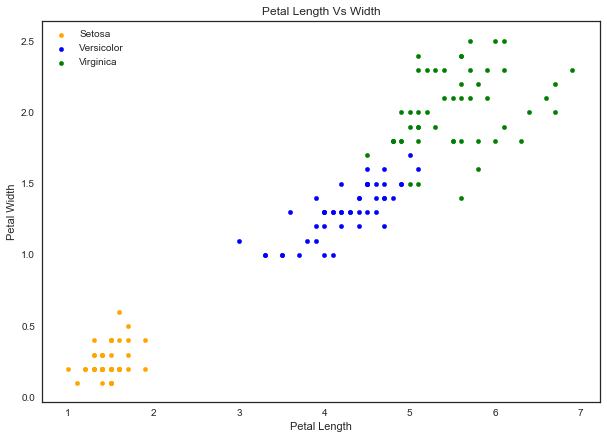

In [14]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind = 'scatter', x = 'PetalLengthCm', y = 'PetalWidthCm', color = 'Orange', label = 'Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind = 'scatter', x = 'PetalLengthCm', y = 'PetalWidthCm', color = 'blue', label = 'Versicolor', ax = fig)
iris[iris.Species == 'Iris-virginica'].plot(kind = 'scatter', x = 'PetalLengthCm', y = 'PetalWidthCm', color = 'green', label = 'Virginica', ax = fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length Vs Width')

fig = plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

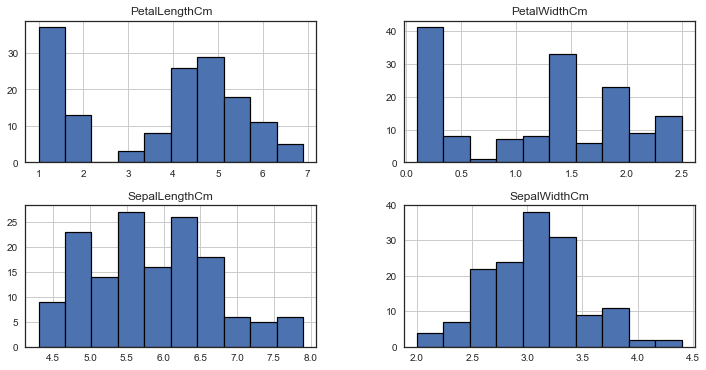

In [25]:
iris.hist(edgecolor = 'black', linewidth = 1.2)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

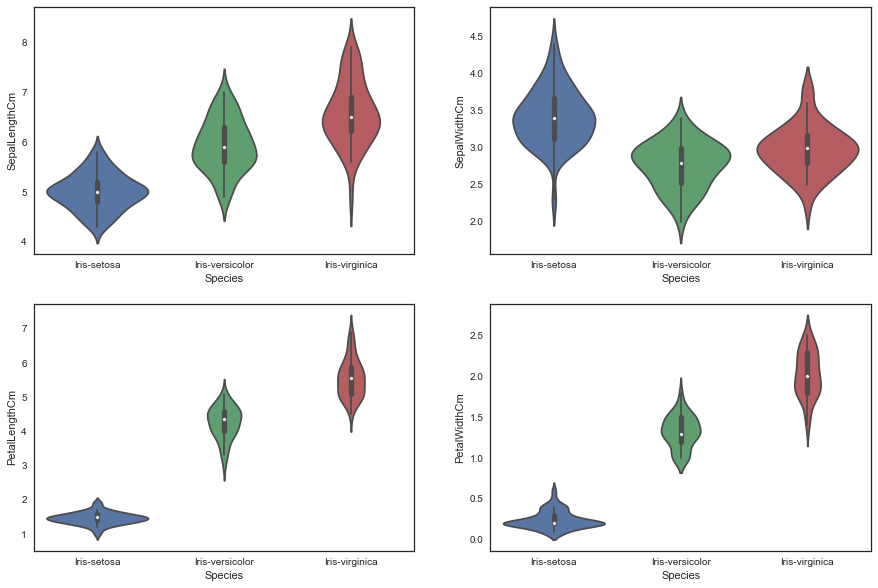

In [32]:
plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
sns.violinplot(x = 'Species', y = 'SepalLengthCm', data = iris)
plt.subplot(2, 2, 2)
sns.violinplot(x = 'Species', y = 'SepalWidthCm', data = iris)

plt.subplot(2, 2, 3)
sns.violinplot(x = 'Species', y = 'PetalLengthCm', data = iris)
plt.subplot(2, 2, 4)
sns.violinplot(x = 'Species', y = 'PetalWidthCm', data = iris)



In [33]:
#Use Classification Algorithm to build a model
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [34]:
iris.shape

(150, 5)

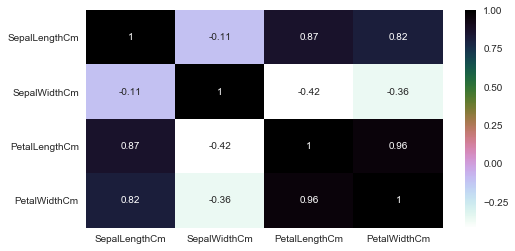

In [35]:
plt.figure(figsize=(8, 4))
sns.heatmap(iris.corr(), annot = True, cmap = 'cubehelix_r')
plt.show()

In [36]:
train, test = train_test_split(iris, test_size = 0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [37]:
train_X = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
train_y = train.Species
test_X = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
test_y = test.Species

In [38]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
24,4.8,3.4,1.9,0.2
84,5.4,3.0,4.5,1.5
56,6.3,3.3,4.7,1.6
27,5.2,3.5,1.5,0.2
121,5.6,2.8,4.9,2.0


In [39]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
58,6.6,2.9,4.6,1.3
39,5.1,3.4,1.5,0.2
113,5.7,2.5,5.0,2.0
82,5.8,2.7,3.9,1.2
2,4.7,3.2,1.3,0.2


In [40]:
train_y.head()

24         Iris-setosa
84     Iris-versicolor
56     Iris-versicolor
27         Iris-setosa
121     Iris-virginica
Name: Species, dtype: object

In [41]:
#Support Vector Machine ->SVM
model = svm.SVC()   #select svm 
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, test_y))

('The accuracy of the SVM is: ', 0.9777777777777777)


In [42]:
#Logistic Regression
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, test_y))

('The accuracy of Logistic Regression is: ', 0.9555555555555556)


In [46]:
#Decision Tree
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))

('The accuracy of Decision Tree is: ', 0.9555555555555556)


In [49]:
#K - Nearest Neighbor
model = KNeighborsClassifier(n_neighbors = 3) #examines 3 neighbors
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction, test_y))

('The accuracy of KNN is: ', 0.9555555555555556)


([<matplotlib.axis.XTick at 0x1a1f19d550>,
 <a list of 10 Text xticklabel objects>)

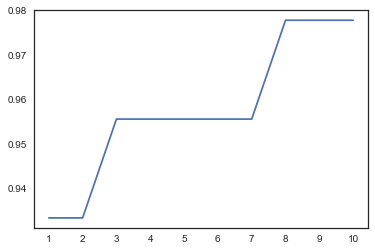

In [50]:
#Lets check for various values for n
a_index = list(range(1, 11))
a = pd.Series()
for i in list(range(1, 11)):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_y)))
plt.plot(a_index, a)
x = [1,2,3,4,5,6,7,8,9,10]
plt.xticks(x)

In [51]:
#Create Petal and Sepal Training Data
petal = iris[['PetalLengthCm', 'PetalWidthCm', 'Species']]
sepal = iris[['SepalLengthCm', 'SepalWidthCm', 'Species']]

In [52]:
train_p,test_p = train_test_split(petal, test_size=0.3, random_state=0) #petals
train_x_p = train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p = train_p.Species

test_x_p = test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p = test_p.Species

In [53]:
train_s,test_s = train_test_split(sepal, test_size=0.3, random_state=0) #sepals
train_x_s = train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s = train_s.Species

test_x_s = test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s = test_s.Species

In [54]:
#SVM Algo
model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

('The accuracy of the SVM using Petals is:', 0.9777777777777777)
('The accuracy of the SVM using Sepals is:', 0.8)


In [55]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

('The accuracy of the Logistic Regression using Petals is:', 0.6888888888888889)
('The accuracy of the Logistic Regression using Sepals is:', 0.6444444444444445)
